## Sentiment Analysis

Here We will do Sentiment Analysis of Tweets [to be added later]

We will import the module that has not be installed 

In [17]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install nltk
!pip install progressbar

  Created wheel for progressbar: filename=progressbar-2.5-cp37-none-any.whl size=12073 sha256=5db9f6243e94dcaf5de7dc9966ae546d5cf30997acab1207d593796761dc47c3
  Stored in directory: /Users/tanvirmahdad/Library/Caches/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built progressbar


## Create the Tweet Dataset

Here we will read the json file and create our dataset

In [2]:
import json

all_tweets=[]

file = open('saturday.json', 'r')
for line in file:
    text = json.loads(line)
    words=text['text']
    all_tweets.append(words)
file.close()

#print(all_tweets)

['@AnupamPKher @NBCNewAmsterdam @AnupamPKher❤❤❤@AnupamPKher \n#SaturdayMotivation😍#SaturdayThoughts \n@NBCNewAmsterdam… https://t.co/uMzCTbjF13', 'RT @PoliticalDi: सिंधिया जी बोल रहे हैं BJP के लिए खून भी बहा दूंगा\n.\n.\n.\n\nवैसे जिस पिस्टल से महात्मा गाँधी की हत्या हुई थी, वो ग्वालियर रा…', 'RT @1IronMan2O2O: Running against Thom "rubber stamp for Trump" Tillis in North Carolina. @CalforNC 5/10\n\nhttps://t.co/Wnu1FyVDhr\n#Saturday…', '#CoronaVirusUpdates #coronapocalypse #MaralagoVirus #SaturdayMorning #Italy #SaturdayThoughts #PiDay #GalaxyS20… https://t.co/cjYtEDsBlf', 'RT @rhondajsp: “Let’s embrace what we have”- this is my favorite thing I’ve seen in social media recently. #hope #SaturdayThoughts https://…', "It's a weekend, so whatever floats your goat. \u2060\n\nhttps://t.co/EuGaEFcWhL\n\n#weekend #goat #SaturdayMorning… https://t.co/XsNkcUIoY5", 'RT @vikramc58591925: #godmorningsaturday\n#SaturdayMotivation\n#SaturdayThoughts\nThe main reason for Saint Rampalji Maharaj going

In [3]:
import requests
from IPython.display import HTML


from bs4 import BeautifulSoup
import unidecode
import re

In [4]:
import numpy as np 
import pandas as pd 
import re  
import nltk 
from sklearn.utils import shuffle
nltk.download('stopwords')  
from nltk.corpus import stopwords 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tanvirmahdad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Training with Caggle Sentiment Dataset

The length of the dataset is 16 million. We have used first 50000 data for our training with RandomForest Classifier

In [5]:
#tweets = pd.read_csv("https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv")
tweets = pd.read_csv("training_16_million.csv", encoding='latin-1')

In [6]:
tweets=shuffle(tweets)
tweets=tweets.head(n=50000)

print(tweets.shape)
#print(tweets.head())
X = tweets.iloc[:, 5].values  
y = tweets.iloc[:, 0].values

condlist=[y==0,y==2,y==4]
choicelist=['negative','neutral','positive']
y=np.select(condlist, choicelist)
print(y)

unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
        


(50000, 6)
['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']
Frequency of unique values of the said array:
[['negative' 'positive']
 ['25016' '24984']]


In [7]:

#This is for Airline Tweets
#X = tweets.iloc[:, 10].values  
#y = tweets.iloc[:, 1].values

X = tweets.iloc[:, 5].values  
y = tweets.iloc[:, 0].values

condlist=[y==0,y==2,y==4]
choicelist=['negative','neutral','positive']
y=np.select(condlist, choicelist)


processed_tweets = []
 
for tweet in range(0, len(X)):  
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))
 
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
 
    processed_tweets.append(processed_tweet)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
X = tfidfconverter.fit_transform(processed_tweets).toarray()

In [9]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0,n_jobs=10)  
text_classifier.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=10, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Lebelling our Dataset with Trained Model

We have lebelled our dataset with trained model in this Section

In [ ]:
import progressbar
from time import sleep

refined_tweets=[]
postitive_tweets=[]
negative_tweets=[]

bar = progressbar.ProgressBar(maxval=len(all_tweets), \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
bar.start()

print(len(all_tweets))

#initialization of Bar Counter

i=0




for tweet in all_tweets:
    
    #Remove username
    processed_tweet=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', processed_tweet)
    
    
    #Unicode
    processed_tweet = unidecode.unidecode(processed_tweet)
 
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
    
    # # Remove backslash
    processed_tweet = processed_tweet.replace("\'", "'")

    #Remove Link
    processed_tweet = re.sub(r'http\S+', '', processed_tweet)
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
    
    #Removing all words upto 3 characters
    processed_tweet=re.sub(r'\b\w{1,3}\b','',processed_tweet)
 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
 
    sentiment = text_classifier.predict(tfidfconverter.transform([ processed_tweet]).toarray())
    #print(processed_tweet ,":", sentiment)
    refined_tweets.append(processed_tweet)
    
    if(sentiment=='positive'):
        postitive_tweets.append(processed_tweet)
    elif(sentiment=='negative'):
        negative_tweets.append(processed_tweet)
     
    i=i+1
    bar.update(i)
    sleep(0.1)
    #print(i)
        



bar.finish()
        
print("Total Tweet Number is:"+ len(refined_tweet))
print("Total Positive Tweet is:"+ len(positive_tweets))
print("Total Negative Tweet is:"+ len(negative_tweets))
        



9461


## Analysis Of the Postive and Negative Tweets

In [ ]:
# get most common words in Scraped Tweets

from collections import Counter
import string




In [68]:
def preprocess_step_two(raw_text):
    
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]
def remove_words(word_list):
    remove = ['paul','ryan','...','“','”','’','…','ryan’']
    return [w for w in word_list if w not in remove]

In [69]:
words_on_fire=preprocess_step_two(refined_tweets)
print(words_on_fire)



['anupampkher', 'nbcnewamsterdam', 'anupampkher', 'anupampkher', 'saturdaymotivation', 'saturdaythoughts', 'nbcnewamsterdam', 'umzctbjf13', 'politicaldi', '1ironman2o2o', 'running', 'thom', 'rubber', 'stamp', 'trump', 'tillis', 'north', 'carolina', 'calfornc', 'wnu1fyvdhr', 'saturday', 'coronavirusupdates', 'coronapocalypse', 'maralagovirus', 'saturdaymorning', 'italy', 'saturdaythoughts', 'piday', 'galaxys20', 'cjytedsblf', 'rhondajsp', 'embrace', 'favorite', 'thing', 'seen', 'social', 'media', 'recently', 'hope', 'saturdaythoughts', 'weekend', 'whatever', 'floats', 'goat', 'eugaefcwhl', 'weekend', 'goat', 'saturdaymorning', 'xsnkcuioy5', 'vikramc58591925', 'godmorningsaturday', 'saturdaymotivation', 'saturdaythoughts', 'main', 'reason', 'saint', 'rampalji', 'maharaj', 'going', 'jail', 'jaychpjones', 'witheverythingsuspended', 'coronavirusupdates', 'panicshopping', 'saturdaythoughts', 'saturdaymorning', 'saturdayvibes', 'beajayemac', 'shameful', 'stage', 'tested', 'supposed', 'suffer'

In [70]:
Counter(words_on_fire).most_common(10)

[('saturdaythoughts', 3434),
 ('covid19', 879),
 ('trump', 621),
 ('would', 545),
 ('coronavirus', 481),
 ('saturdaymorning', 473),
 ('people', 467),
 ('closing', 465),
 ('coronavirusupdates', 454),
 ('julietknows1', 405)]

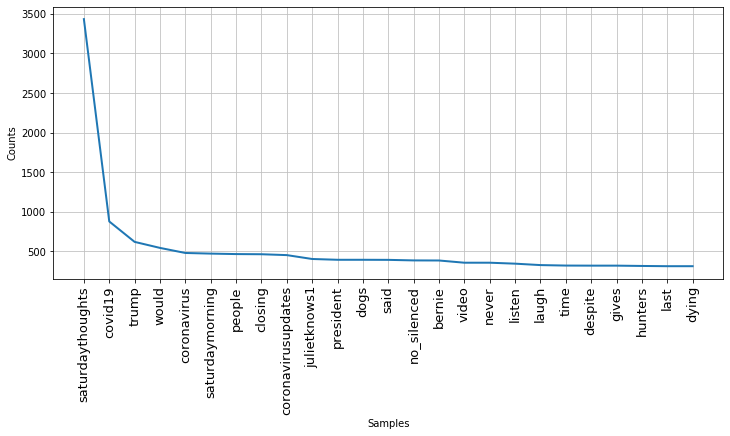

Text(0.5, 0, 'Word Rank')

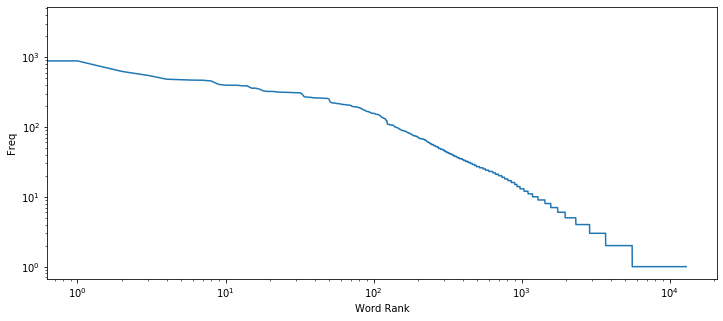

In [77]:
import matplotlib.pyplot as plt

# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(words_on_fire)
fd.plot(25,cumulative=False)
# log-log of all words 
word_counts = sorted(Counter(words_on_fire).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

In [78]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


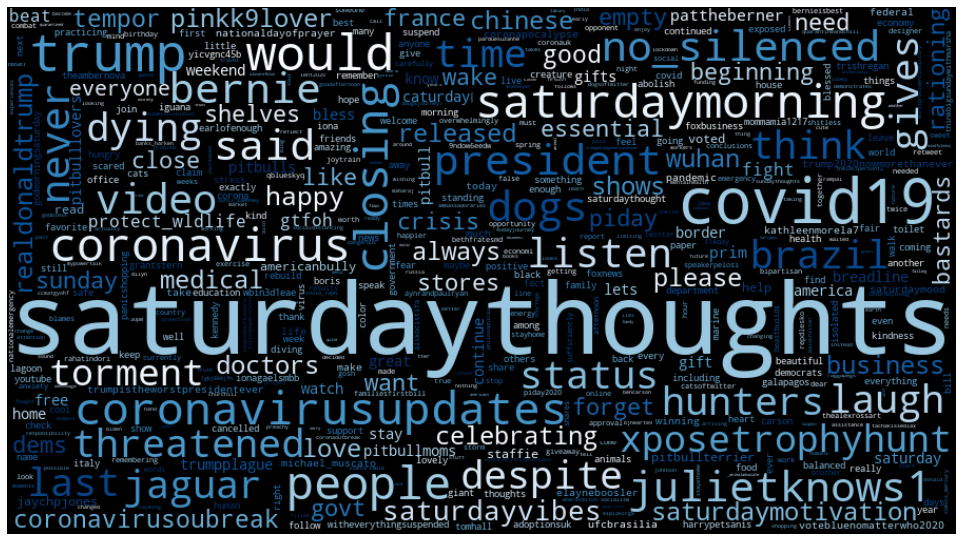

In [82]:
# create a word frequency dictionary
wordfreq = Counter(words_on_fire)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()